## Graph Analysis

In [54]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from nose.tools import assert_equal, assert_almost_equal, assert_is_instance, assert_true, assert_false
from numpy.testing import assert_array_equal, assert_array_almost_equal

### Florentine Families Social Network

In [55]:
g=nx.florentine_families_graph()

In [58]:
def draw_graph(graph):
    '''
    Draws the social network of the Florentine families.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    fig, ax=plt.subplots(figsize=(6, 6))
    clrs = sns.color_palette("Paired")
    nx.draw(graph, with_labels=True, node_color=clrs[0], node_size=750)
    return ax

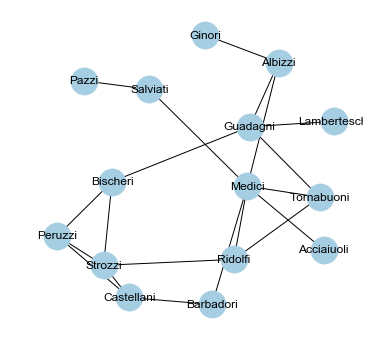

In [59]:
ax1 = draw_graph(g)
plt.show()

In [60]:
assert_is_instance(ax1, mpl.axes.Axes)
assert_equal(ax1.collections[0].get_offsets().shape[0], len(g.nodes()))
assert_equal(len(ax1.collections[1].get_segments()), len(g.edges()))

### Measures of centrality

In [63]:
def get_centrality(graph):
    degree=nx.degree_centrality(graph)
    betweenness=nx.betweenness_centrality(graph)
    closeness=nx.closeness_centrality(graph)
    return degree, betweenness, closeness

In [64]:
degree, betweenness, closeness = get_centrality(g)
print('Node \t Degree \t Betweenness \t Closeness')
for node in degree:
    print('{0:} \t {1:7f} \t {2:7f} \t {3:7f}'.format(node, degree[node], betweenness[node], closeness[node]))

Node 	 Degree 	 Betweenness 	 Closeness
Acciaiuoli 	 0.071429 	 0.000000 	 0.368421
Medici 	 0.428571 	 0.521978 	 0.560000
Castellani 	 0.214286 	 0.054945 	 0.388889
Peruzzi 	 0.214286 	 0.021978 	 0.368421
Strozzi 	 0.285714 	 0.102564 	 0.437500
Barbadori 	 0.142857 	 0.093407 	 0.437500
Ridolfi 	 0.214286 	 0.113553 	 0.500000
Tornabuoni 	 0.214286 	 0.091575 	 0.482759
Albizzi 	 0.214286 	 0.212454 	 0.482759
Salviati 	 0.142857 	 0.142857 	 0.388889
Pazzi 	 0.071429 	 0.000000 	 0.285714
Bischeri 	 0.214286 	 0.104396 	 0.400000
Guadagni 	 0.285714 	 0.254579 	 0.466667
Ginori 	 0.071429 	 0.000000 	 0.333333
Lamberteschi 	 0.071429 	 0.000000 	 0.325581


In [65]:
assert_is_instance(degree, dict)
assert_equal(sorted(list(degree.keys())), ['Acciaiuoli', 'Albizzi', 'Barbadori', 'Bischeri', 'Castellani', 
                                           'Ginori', 'Guadagni', 'Lamberteschi', 'Medici', 'Pazzi', 'Peruzzi', 
                                           'Ridolfi', 'Salviati', 'Strozzi', 'Tornabuoni'])
assert_almost_equal(degree['Ginori'], 0.071429,3)
assert_almost_equal(betweenness['Ridolfi'], 0.113553,3)
assert_almost_equal(closeness['Albizzi'], 0.482759,3)

In [137]:
def draw_graph_friends(graph):
    '''
    Draws the social network of the Florentine families,
    but uses different colors for friends of node 'Medici' and node 'Guadagni'.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    fig, ax=plt.subplots(figsize=(8, 8))
    clrs = sns.color_palette("Paired")
    pos=nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color=clrs[0], node_size=750)
    nx.draw_networkx_nodes(graph, pos, nodelist=[i for i in nx.all_neighbors(g, 'Medici')]+['Medici'],node_color=clrs[2],node_size=750)
    nx.draw_networkx_nodes(graph, pos, nodelist=[j for j in nx.all_neighbors(g, 'Guadagni')]+['Guadagni'],node_color=clrs[4],node_size=750)
    return ax    

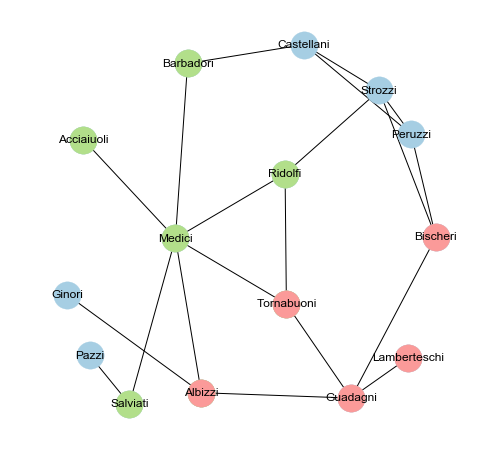

In [138]:
ax2 = draw_graph_friends(g)
plt.show()

In [139]:
assert_is_instance(ax2, mpl.axes.Axes)
assert_equal(ax2.collections[0].get_offsets().shape[0], len(g.nodes()))
assert_equal(len(ax2.collections[1].get_segments()), len(g.edges()))
assert_equal(len(ax2.collections[2].get_offsets()), 7)
assert_equal(len(ax2.collections[3].get_offsets()), 5)
assert_false(np.all(ax2.collections[2].get_facecolor() == ax2.collections[3].get_facecolor()))

### Cliques

In [143]:
def find_node_cliques(graph,node):
    '''
    Returns the cliques from the graph in which `node` is participating.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.
    
    Returns
    -------
    List of cliques containing `node`.
    '''
    
    cliques=nx.cliques_containing_node(graph,node)
    return cliques

In [144]:
cliques1 = find_node_cliques(g,'Medici')

print("Cliques of which the Medici family node is a part of:")
print(60*"-")
for clique in cliques1:
    print(clique)

cliques2 = find_node_cliques(g,'Guadagni')

print("\nCliques of which the Guadagni family node is a part of:")
print(60*"-")
for clique in cliques2:
    print(clique)

Cliques of which the Medici family node is a part of:
------------------------------------------------------------
['Medici', 'Ridolfi', 'Tornabuoni']
['Medici', 'Albizzi']
['Medici', 'Barbadori']
['Medici', 'Salviati']
['Medici', 'Acciaiuoli']

Cliques of which the Guadagni family node is a part of:
------------------------------------------------------------
['Lamberteschi', 'Guadagni']
['Guadagni', 'Albizzi']
['Guadagni', 'Bischeri']
['Guadagni', 'Tornabuoni']


In [145]:
assert_is_instance(cliques1, list)
assert_equal(len(cliques1),5)
assert_true((['Medici', 'Acciaiuoli'] in cliques1) or (['Acciaiuoli', 'Medici'] in cliques1))
assert_true((['Medici', 'Salviati'] in cliques1) or (['Salviati', 'Medici'] in cliques1))
assert_is_instance(cliques2, list)
assert_equal(len(cliques2),4)
assert_true((['Guadagni', 'Albizzi'] in cliques2) or (['Albizzi', 'Guadagni'] in cliques2))
assert_true((['Guadagni', 'Bischeri'] in cliques2) or (['Bischeri', 'Guadagni'] in cliques2))